# Analytical solutions

## Transient heat conduction in a solid sphere with convective boundary

Based on Ozisik (2012)
A solid sphere of radius $b$ is initially at temperature $F(r)$. 
For $t >0$, the boundary condition at $r = b$ dissipates heat by convection, with convection coefficient $h$ into a fluid at zero temperature.

The mathematical formulation is 

\begin{matrix}
\frac{\partial^2 T}{\partial r^2} + \frac{2}{r}\frac{\partial T}{\partial r} = \frac{1}{\alpha} \frac{\partial T}{\partial t}  & \text{in} & 0\leq r\leq b & t>0
\end{matrix}


\begin{matrix}
BC1: \frac{\partial T}{\partial r} (r\rightarrow 0) = 0  \\
BC2: -k \left. \frac{\partial T}{\partial r} \right|_{r=b} = h \left.T  \right|_{r=b} \\
IC: T(t=0) = F(r)
\end{matrix}

The equation 1 can be written as 

$$ \frac{1}{r}\frac{\partial }{\partial r^2} \left( rT \right)= \frac{1}{\alpha} \frac{\partial T}{\partial t} $$

Introducing a new dependent variable $U(r,T)$, given that

$$ U(r,t) = rT(r,t)$$ 
the equation is now
$$ \frac{\partial^2 U }{\partial r^2} \left( rT \right)= \frac{1}{\alpha} \frac{\partial U}{\partial t} $$

In order to transform the boundary conditions, we consider a change of dependent variable for the spatial derivative of T:

$$  \frac{\partial T}{\partial t} =  \frac{\partial}{\partial r} \left(\frac{U}{r} \right) = \frac{1}{r}\frac{\partial U}{\partial r} - \frac{1}{r^2} U  $$

As the result, an additional term, $\frac{1}{r^2} U$, is added to each derivative term in a boundary condition; hence both insulated and convective boundary conditions each obtain an additional term. One must also consider the condition of finiteness as $(r\rightarrow 0$, which now takes the form
$$ 
T(r\rightarrow 0) \Rightarrow finite  ⇒ \lim_{r\rightarrow 0} \frac{U(r)}{r}
$$
which is only finite for the expected trigonometric functions if the numerator is zero in the limit, which then enables the application of L’Hˆopital’s rule. Thus finiteness at the origin requires $U(r = 0) = 0$.

Reformulating the problem and its boundary conditions:

\begin{matrix}
\frac{\partial^2 U }{\partial r^2} = \frac{1}{\alpha} \frac{\partial U}{\partial t}  & \text{in} & 0\leq r\leq b & t>0
\end{matrix}

\begin{matrix}
BC1: U(r = 0) = 0 \\
BC2: \left. \frac{\partial U}{\partial r} \right|_{r=b}  + \left( \frac{h}{k} -  \frac{1}{b} \right)  \left.U \right|_{r=b}  = 0\\
IC: U(t=0) = r F(r)
\end{matrix}

For convenience, we will introduce the constant $K = \left( \frac{h}{k} -  \frac{1}{b} \right) $ intoprevious. With the successful transformation and with all homogeneous boundary conditions, we are now ready to proceed with separation of the form

$$ U(r,t) = R(r) \Gamma (t) $$
which leads to
$$
\frac{1}{R}\frac{d^2 R }{d r^2} = \frac{1}{\alpha \Gamma} \frac{d \Gamma}{d t} = - \lambda^2
$$
Solution of separated ODE in the t dimension yields
$$ \Gamma (t) = C_1 e^{-\alpha \lambda^2 t}$$

while solution of the separated ODE in the r dimension gives
$$ R(r) = C_2 cos \lambda r + C_3 sin \lambda r$$

Boundary condition BC1 yields $C_2 = 0$, while BC2 yields the following transcendental equation

\begin{matrix} 
\lambda_n cot \lambda_n b = -K & \rightarrow & \lambda_n & \text{for} & n=1,2,3...
\end{matrix}

The transcendental equation may be recast in the form $b \lambda_n  cot \lambda_n b + bK =0 $, which has all real roots if $bK >−1$, and noting that $\lambda_n  = 0$ is an eigenvalue only for the special case of $bK = −1$. 
When the value of $K$ as defined above is introduced into the inequality $bK >−1$, we find the necessary condition for all
real roots given as $bh/k >0$ (i.e., $Bi >0$). This result is satisfied with the physical requirements of a positive radius, convection coefficient, and thermal conductivity.

We now sum over all possible solutions, yielding the general solution

$$ U(r,t) = \sum_{n=1}^\infty C_n sin(\lambda_n r)e^{-\alpha \lambda^2_n t}$$

with $C_n = C_1 C_3 $. The initial condition is now applied, yielding

$$ U(t=0) = r F(r) = \sum_{n=1}^\infty C_n sin(\lambda_n r) $$

We solve for the Fourier coefficients by applying the operator

$$\ast\int_{r=0}^b sin \left( \lambda_q r\right) dr $$

which yields the result

$$ C_n = \frac{\int_{r=0}^b r F(r) sin \left( \lambda_n r\right) dr }{\int_{r=0}^b sin^2 \left( \lambda_n r\right) dr}$$

The denominator is the norm $N(\lambda_n)$ and may be simplified with the replacement of $H_2$ with $K$. We finally transform the problem back to $T(r,t )$, yielding the result

$$ T(r,t) = \frac{U(r,t)}{r} = \sum_{n=1}^\infty C_n \frac{sin(\lambda_n r)}{r} e^{-\alpha \lambda^2_n t}$$

We know that the limit as $r \rightarrow 0$ exists and is finite per L’Hˆopital’s rule. In fact, in this limit, the temperature at the center of the sphere becomes

$$ T(r=0,t) =  \sum_{n=1}^\infty C_n \lambda_n e^{-\alpha \lambda^2_n t}$$

The steady-state solution for the entire sphere is simply $T = 0$.

The average temperature is given as:
$$T_{av}(t) = \frac{\int_0^R 4 \pi r^2 T(r,t) dr}{\frac{4}{3} \pi R^3} = \frac{3}{R^3} \int_0^R r^2 T(r,t) dr \tag{6}$$



In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.optimize import root
from scipy.optimize import fsolve
import scipy.integrate as integrate

def func_cos(x, c):
    return np.cos(x) / x - c

#crange = range(1, 11)

#res = [root(func_cos, 0.5, args=(ci, )).x[0] for ci in crange]
#print(res)


def transcedental_equation(x):
    return x *(1/math.tan(x*b)) + K

def find_lambdas(transcedental_equation, k):
    nrange = range(0, k)
    solution = []
    for i in nrange:
        j = root(transcedental_equation, (i-0.5*math.pi)).x[0]
        solution.append(str('{:f}'.format(j)))

    cleanlist = []
    [cleanlist.append(x) for x in solution if (x not in cleanlist and (float(x) > 0))]

    roots = [float(x) for x in cleanlist]
    return(roots)


        
def computeCn(b, Fr, lambda_n, K):
    solution = []
    for i in range(len(lambda_n)):
        #print(lambda_n[i])
        A = (integrate.quad(lambda r: r*Fr*math.sin(r*lambda_n[i]), 0, b)[0])
        #B = (integrate.quad(lambda r: math.pow((math.sin(r*lambda_n[i])), 2.0), 0, b)[0])
        result = A*(2*(lambda_n[i]*lambda_n[i]+K*K)/(b*(lambda_n[i]*lambda_n[i]+K*K)+K))
        #print(A)
        solution.append(result)
    return(solution)

def Temperature(lambda_n, Cn, r, t):
    T = 0
    for i in range(len(lambda_n)):
        #print("i = ", i)
        #print("Cn[i] = ", Cn[i])
        #print("exp = ", -1.0*alpha*lambda_n[i]*lambda_n[i])
        #print("Psi = ", lambda_n[i]*r)
        T = T + Cn[i]*(1.0/(r+0.0000000001))*(math.sin(lambda_n[i]*r))*math.exp(-1.0*alpha*lambda_n[i]*lambda_n[i]*t)
        #print(T)
    return(T)
    

def average_temperature(lambda_n, Cn, R, t):
    f = lambda r: r*r*Temperature(lambda_n, Cn, r, t)
    y = integrate.quad(f, 0, R)
    return((3.0/(R*R*R)*y[0]))


In [31]:

#General parameters:
radius = 1.0
b= radius  
rho = 1.0
cp = 1.0
k=1.0
#Tm = 0.0
alpha = k/(rho*cp)
print(alpha)
Tav_0 = 1.0
Fr = Tav_0
k_f = 1.0
Nu = np.array([0.2, 1, 2, 4, 10])
#Nu = np.array([0.4, 4, 10])
h = Nu*k_f/(2*radius)
Biot = h*radius/k
print("Biot = ", Biot)
K_array = (h/k - 1/b)

#Nu = h*radius*2/k_f

#print(K_array)
#print(Nu)
#print(h)

temperature_list = list()
average_temperature_list = list()
t = np.linspace(0,2.0, 100)

for i in range(len(K_array)):
    K = K_array[i]
    lambdas = find_lambdas(transcedental_equation, 300)
    Cn = computeCn(b, Fr, lambdas, K)
    Temperature_array = np.zeros(len(t))
    Average_Temperature_array = np.zeros(len(t))
    
    for j in range(len(t)):
        Temperature_array[j] =Temperature(lambdas, Cn, radius, t[j])
        #print(Temperature(lambdas, Cn, radius, t[j]))
        Average_Temperature_array[j] = average_temperature(lambdas, Cn, radius, t[j]) 
    temperature_list.append(Temperature_array)
    average_temperature_list.append(Average_Temperature_array)

print(temperature_list[3])
print(average_temperature_list[3])
#print(temperature_list[1])


1.0
Biot =  [ 0.1  0.5  1.   2.   5. ]
[  9.95733921e-01   7.15698030e-01   6.16418561e-01   5.46383769e-01
   4.91098858e-01   4.45024965e-01   4.05364678e-01   3.70493195e-01
   3.39385980e-01   3.11359421e-01   2.85935464e-01   2.62764693e-01
   2.41580517e-01   2.22171188e-01   2.04362421e-01   1.88006453e-01
   1.72975053e-01   1.59154977e-01   1.46444934e-01   1.34753508e-01
   1.23997676e-01   1.14101716e-01   1.04996363e-01   9.66181315e-02
   8.89087590e-02   8.18147272e-02   7.52868468e-02   6.92798895e-02
   6.37522576e-02   5.86656860e-02   5.39849713e-02   4.96777235e-02
   4.57141404e-02   4.20667993e-02   3.87104668e-02   3.56219234e-02
   3.27798026e-02   3.01644430e-02   2.77577521e-02   2.55430808e-02
   2.35051088e-02   2.16297378e-02   1.99039946e-02   1.83159410e-02
   1.68545914e-02   1.55098365e-02   1.42723739e-02   1.31336430e-02
   1.20857665e-02   1.11214955e-02   1.02341595e-02   9.41762029e-03
   8.66622915e-03   7.97478827e-03   7.33851445e-03   6.75300617

In [32]:
#Standard

Rocky_zero_way_Bi01_standard = open("temperature_bi_01_standard.csv", 'r')
t_zero_way_Bi01_standard, temp_zero_way_Bi01_standard = np.loadtxt(Rocky_zero_way_Bi01_standard, delimiter = ',', skiprows = 1, unpack = True)    
Rocky_zero_way_Bi01_standard.close()

Rocky_zero_way_Bi05_standard = open("temperature_bi_05_standard.csv", 'r')
t_zero_way_Bi05_standard, temp_zero_way_Bi05_standard = np.loadtxt(Rocky_zero_way_Bi05_standard, delimiter = ',', skiprows = 1, unpack = True)    
Rocky_zero_way_Bi05_standard.close()

Rocky_zero_way_Bi1_standard = open("temperature_bi_1_standard.csv", 'r')
t_zero_way_Bi1_standard, temp_zero_way_Bi1_standard = np.loadtxt(Rocky_zero_way_Bi1_standard, delimiter = ',', skiprows = 1, unpack = True)    
Rocky_zero_way_Bi1_standard.close()

Rocky_zero_way_Bi2_standard = open("temperature_bi_2_standard.csv", 'r')
t_zero_way_Bi2_standard, temp_zero_way_Bi2_standard = np.loadtxt(Rocky_zero_way_Bi2_standard, delimiter = ',', skiprows = 1, unpack = True)    
Rocky_zero_way_Bi2_standard.close()

Rocky_zero_way_Bi5_standard = open("temperature_bi_5_standard.csv", 'r')
t_zero_way_Bi5_standard, temp_zero_way_Bi5_standard = np.loadtxt(Rocky_zero_way_Bi5_standard, delimiter = ',', skiprows = 1, unpack = True)    
Rocky_zero_way_Bi5_standard.close()

#Improved H20

Rocky_zero_way_Bi01_improved_h20 = open("temperature_bi_01_improved.csv", 'r')
t_zero_way_Bi01_improved_h20, temp_zero_way_Bi01_improved_h20 = np.loadtxt(Rocky_zero_way_Bi01_improved_h20, delimiter = ',', skiprows = 1, unpack = True)    
Rocky_zero_way_Bi01_improved_h20.close()

Rocky_zero_way_Bi05_improved_h20 = open("temperature_bi_05_improved.csv", 'r')
t_zero_way_Bi05_improved_h20, temp_zero_way_Bi05_improved_h20 = np.loadtxt(Rocky_zero_way_Bi05_improved_h20, delimiter = ',', skiprows = 1, unpack = True)    
Rocky_zero_way_Bi05_improved_h20.close()

Rocky_zero_way_Bi1_improved_h20 = open("temperature_bi_1_improved.csv", 'r')
t_zero_way_Bi1_improved_h20, temp_zero_way_Bi1_improved_h20 = np.loadtxt(Rocky_zero_way_Bi1_improved_h20, delimiter = ',', skiprows = 1, unpack = True)    
Rocky_zero_way_Bi1_improved_h20.close()

Rocky_zero_way_Bi2_improved_h20 = open("temperature_bi_2_improved.csv", 'r')
t_zero_way_Bi2_improved_h20, temp_zero_way_Bi2_improved_h20 = np.loadtxt(Rocky_zero_way_Bi2_improved_h20, delimiter = ',', skiprows = 1, unpack = True)    
Rocky_zero_way_Bi2_improved_h20.close()

Rocky_zero_way_Bi5_improved_h20 = open("temperature_bi_5_improved.csv", 'r')
t_zero_way_Bi5_improved_h20, temp_zero_way_Bi5_improved_h20 = np.loadtxt(Rocky_zero_way_Bi5_improved_h20, delimiter = ',', skiprows = 1, unpack = True)    
Rocky_zero_way_Bi5_improved_h20.close()

#Improved H21

Rocky_zero_way_Bi01_improved_h21 = open("temperature_bi_01_improved_h21.csv", 'r')
t_zero_way_Bi01_improved_h21, temp_zero_way_Bi01_improved_h21 = np.loadtxt(Rocky_zero_way_Bi01_improved_h21, delimiter = ',', skiprows = 1, unpack = True)    
Rocky_zero_way_Bi01_improved_h21.close()

Rocky_zero_way_Bi05_improved_h21 = open("temperature_bi_05_improved_h21.csv", 'r')
t_zero_way_Bi05_improved_h21, temp_zero_way_Bi05_improved_h21 = np.loadtxt(Rocky_zero_way_Bi05_improved_h21, delimiter = ',', skiprows = 1, unpack = True)    
Rocky_zero_way_Bi05_improved_h21.close()

Rocky_zero_way_Bi1_improved_h21 = open("temperature_bi_1_improved_h21.csv", 'r')
t_zero_way_Bi1_improved_h21, temp_zero_way_Bi1_improved_h21 = np.loadtxt(Rocky_zero_way_Bi1_improved_h21, delimiter = ',', skiprows = 1, unpack = True)    
Rocky_zero_way_Bi1_improved_h21.close()

Rocky_zero_way_Bi2_improved_h21 = open("temperature_bi_2_improved_h21.csv", 'r')
t_zero_way_Bi2_improved_h21, temp_zero_way_Bi2_improved_h21 = np.loadtxt(Rocky_zero_way_Bi2_improved_h21, delimiter = ',', skiprows = 1, unpack = True)    
Rocky_zero_way_Bi2_improved_h21.close()

Rocky_zero_way_Bi5_improved_h21 = open("temperature_bi_5_improved_h21.csv", 'r')
t_zero_way_Bi5_improved_h21, temp_zero_way_Bi5_improved_h21 = np.loadtxt(Rocky_zero_way_Bi5_improved_h21, delimiter = ',', skiprows = 1, unpack = True)    
Rocky_zero_way_Bi5_improved_h21.close()



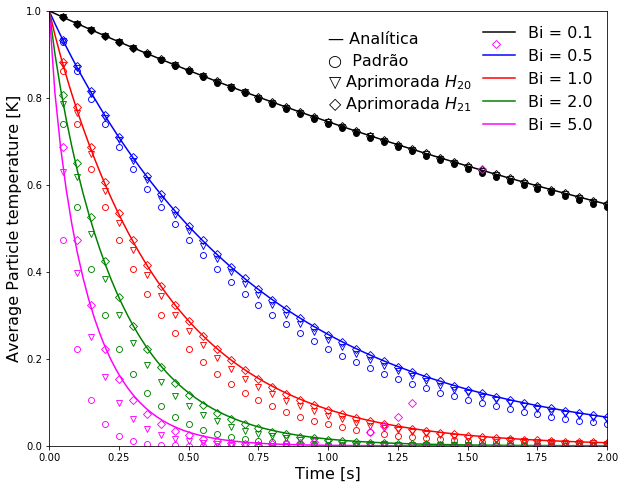

In [33]:
plt.rcParams["figure.figsize"] = (10.0, 8.0)
#plt.plot(t,temperature_list[0], linestyle = "-", color = "black", label = "Analítica (Bi = {0:.1f})".format(Biot[0]))
#plt.plot(t,temperature_list[1], linestyle = "-", color = "blue", label = "Analítica (Bi = {0:.1f})".format(Biot[1]))
#plt.plot(t,temperature_list[2], linestyle = "-", color = "red", label = "Analítica (Bi = {0:.1f})".format(Biot[2]))

plt.plot(t,average_temperature_list[0], linestyle = "-", color = "black", label = "Bi = {0:.1f}".format(Biot[0]))
plt.plot(t,average_temperature_list[1], linestyle = "-", color = "blue", label = "Bi = {0:.1f}".format(Biot[1]))
plt.plot(t,average_temperature_list[2], linestyle = "-", color = "red", label = "Bi = {0:.1f}".format(Biot[2]))
plt.plot(t,average_temperature_list[3], linestyle = "-", color = "green", label = "Bi = {0:.1f}".format(Biot[3]))
plt.plot(t,average_temperature_list[4], linestyle = "-", color = "magenta", label = "Bi = {0:.1f}".format(Biot[4]))

plt.plot(t_zero_way_Bi01_standard, temp_zero_way_Bi01_standard, linestyle = "None", marker = 'o', markeredgecolor = "black", 
         markeredgewidth = 0.9, markevery=1, markerfacecolor = "black")
plt.plot(t_zero_way_Bi05_standard, temp_zero_way_Bi05_standard, linestyle = "None", marker = 'o', markeredgecolor = "blue", 
         markeredgewidth = 0.9, markevery=1, markerfacecolor = "none")
plt.plot(t_zero_way_Bi1_standard, temp_zero_way_Bi1_standard, linestyle = "None", marker = 'o', markeredgecolor = "red", 
         markeredgewidth = 0.9, markevery=1, markerfacecolor = "none")
plt.plot(t_zero_way_Bi2_standard, temp_zero_way_Bi2_standard, linestyle = "None", marker = 'o', markeredgecolor = "green", 
         markeredgewidth = 0.9, markevery=1, markerfacecolor = "none")
plt.plot(t_zero_way_Bi5_standard, temp_zero_way_Bi5_standard, linestyle = "None", marker = 'o', markeredgecolor = "magenta", 
         markeredgewidth = 0.9, markevery=1, markerfacecolor = "none")


plt.plot(t_zero_way_Bi01_improved_h20, temp_zero_way_Bi01_improved_h20, linestyle = "None", marker = 'v', markeredgecolor = "black", 
         markeredgewidth = 0.9, markevery=1, markerfacecolor = "none")
plt.plot(t_zero_way_Bi05_improved_h20, temp_zero_way_Bi05_improved_h20, linestyle = "None", marker = 'v', markeredgecolor = "blue", 
         markeredgewidth = 0.9, markevery=1, markerfacecolor = "none")
plt.plot(t_zero_way_Bi1_improved_h20, temp_zero_way_Bi1_improved_h20, linestyle = "None", marker = 'v', markeredgecolor = "red", 
         markeredgewidth = 0.9, markevery=1, markerfacecolor = "none")
plt.plot(t_zero_way_Bi2_improved_h20, temp_zero_way_Bi2_improved_h20, linestyle = "None", marker = 'v', markeredgecolor = "green", 
         markeredgewidth = 0.9, markevery=1, markerfacecolor = "none")
plt.plot(t_zero_way_Bi5_improved_h20, temp_zero_way_Bi5_improved_h20, linestyle = "None", marker = 'v', markeredgecolor = "magenta", 
         markeredgewidth = 0.9, markevery=1, markerfacecolor = "none")

plt.plot(t_zero_way_Bi01_improved_h21, temp_zero_way_Bi01_improved_h21, linestyle = "None", marker = 'D', markeredgecolor = "black", 
         markeredgewidth = 0.9, markevery=1, markerfacecolor = "none")
plt.plot(t_zero_way_Bi05_improved_h21, temp_zero_way_Bi05_improved_h21, linestyle = "None", marker = 'D', markeredgecolor = "blue", 
         markeredgewidth = 0.9, markevery=1, markerfacecolor = "none")
plt.plot(t_zero_way_Bi1_improved_h21, temp_zero_way_Bi1_improved_h21, linestyle = "None", marker = 'D', markeredgecolor = "red", 
         markeredgewidth = 0.9, markevery=1, markerfacecolor = "none")
plt.plot(t_zero_way_Bi2_improved_h21, temp_zero_way_Bi2_improved_h21, linestyle = "None", marker = 'D', markeredgecolor = "green", 
         markeredgewidth = 0.9, markevery=1, markerfacecolor = "none")
plt.plot(t_zero_way_Bi5_improved_h21, temp_zero_way_Bi5_improved_h21, linestyle = "None", marker = 'D', markeredgecolor = "magenta", 
         markeredgewidth = 0.9, markevery=1, markerfacecolor = "none")

plt.xlim(0, 2)     
plt.ylim(0, 1) 
plt.legend(fontsize=16, loc='upper right', frameon=False)
plt.ylabel('Average Particle temperature [K]', fontsize=16)
plt.xlabel('Time [s]', fontsize=16)
plt.annotate('\u2014 Analítica',xy=(1.0, 0.925), fontsize=16)
plt.annotate('\u25CB  Padrão', xy=(1.0, 0.875), fontsize=16)
plt.annotate('\u25BD Aprimorada $H_{20}$', xy=(1.0, 0.825), fontsize=16)
plt.annotate('\u25C7 Aprimorada $H_{21}$', xy=(1.0, 0.775), fontsize=16)
plt.show()


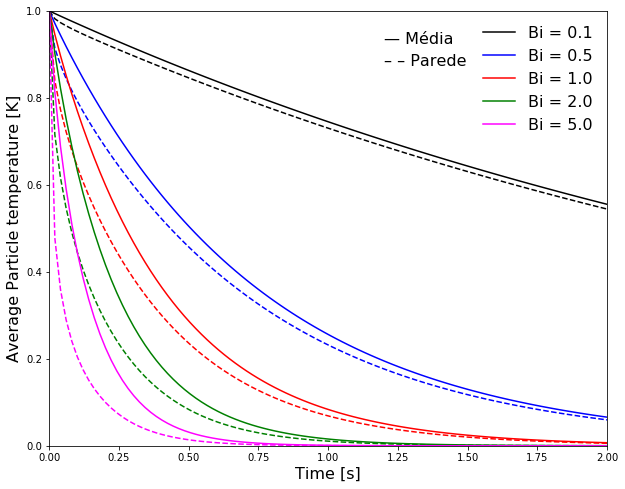

In [34]:
plt.rcParams["figure.figsize"] = (10.0, 8.0)
plt.plot(t,temperature_list[0], linestyle = "--", color = "black")
plt.plot(t,temperature_list[1], linestyle = "--", color = "blue")
plt.plot(t,temperature_list[2], linestyle = "--", color = "red")
plt.plot(t,temperature_list[3], linestyle = "--", color = "green")
plt.plot(t,temperature_list[4], linestyle = "--", color = "magenta")


plt.plot(t,average_temperature_list[0], linestyle = "-", color = "black", label = "Bi = {0:.1f}".format(Biot[0]))
plt.plot(t,average_temperature_list[1], linestyle = "-", color = "blue", label = "Bi = {0:.1f}".format(Biot[1]))
plt.plot(t,average_temperature_list[2], linestyle = "-", color = "red", label = "Bi = {0:.1f}".format(Biot[2]))
plt.plot(t,average_temperature_list[3], linestyle = "-", color = "green", label = "Bi = {0:.1f}".format(Biot[3]))
plt.plot(t,average_temperature_list[4], linestyle = "-", color = "magenta", label = "Bi = {0:.1f}".format(Biot[4]))

plt.xlim(0, 2)     
plt.ylim(0, 1) 
plt.legend(fontsize=16, loc='upper right', frameon=False)
plt.ylabel('Average Particle temperature [K]', fontsize=16)
plt.xlabel('Time [s]', fontsize=16)
plt.annotate('\u2014 Média',xy=(1.2, 0.925), fontsize=16)
plt.annotate('\u2013 \u2013 Parede', xy=(1.2, 0.875), fontsize=16)
plt.show()